In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
img=cv2.imread('happy.jpeg')

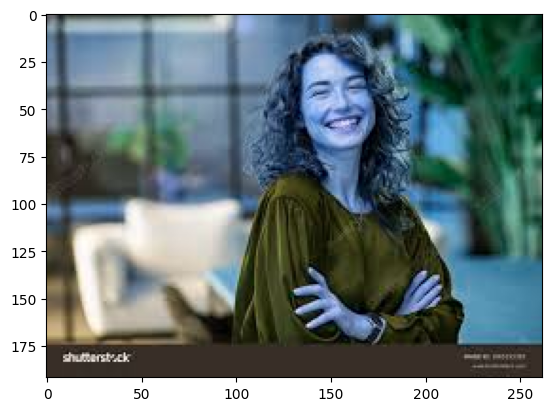

In [3]:
plt.imshow(img)

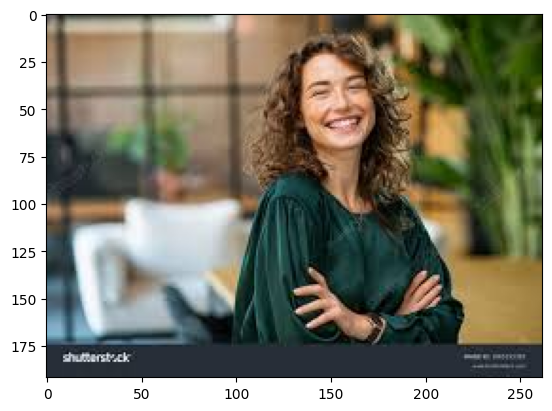

In [4]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [5]:
from deepface import DeepFace

In [6]:
predictions=DeepFace.analyze(img)
# predictions

Action: race: 100%|███████| 4/4 [00:46<00:00, 11.64s/it]


In [7]:
predictions

[{'emotion': {'angry': 2.244360838669912e-12,
   'disgust': 1.0386661908852848e-24,
   'fear': 1.4911470817743347e-13,
   'happy': 99.99866485595703,
   'sad': 5.720667689557146e-09,
   'surprise': 7.01921067047806e-05,
   'neutral': 0.0012643622540053912},
  'dominant_emotion': 'happy',
  'region': {'x': 127,
   'y': 19,
   'w': 53,
   'h': 53,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.93,
  'age': 33,
  'gender': {'Woman': 99.98661279678345, 'Man': 0.013380590826272964},
  'dominant_gender': 'Woman',
  'race': {'asian': 0.10282821021974087,
   'indian': 0.020628255151677877,
   'black': 0.0010405297871329822,
   'white': 93.3772087097168,
   'middle eastern': 2.36574150621891,
   'latino hispanic': 4.132550209760666},
  'dominant_race': 'white'}]

In [8]:
# dict(predictions)
print(predictions[0]['dominant_emotion'])

happy


In [9]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_default.xml')

In [10]:
grey=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
faces=faceCascade.detectMultiScale(grey,1.1,4)

for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

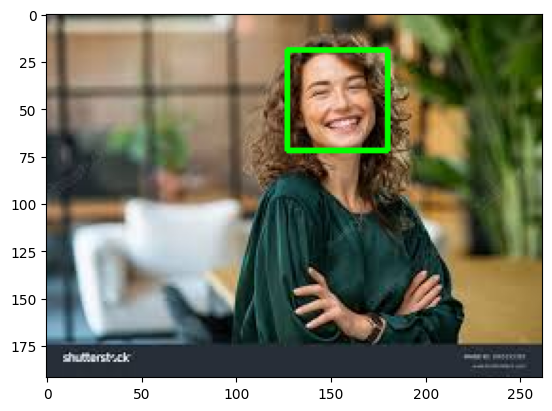

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,str(predictions[0]['dominant_emotion']),(10,100),font,2,(0,255,0),1,cv2.LINE_4);


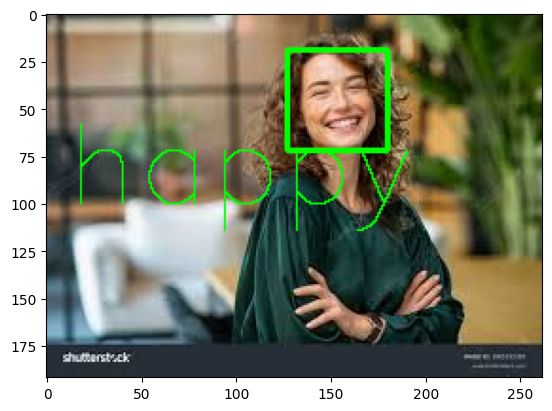

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
img=cv2.imread('sad.jpeg')

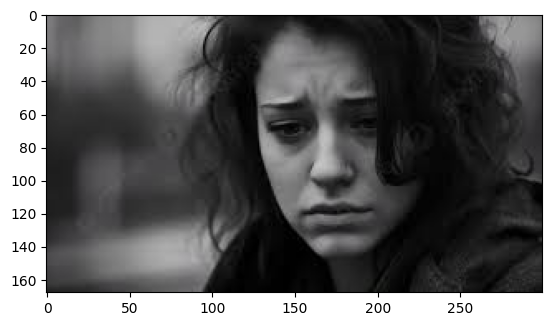

In [15]:
plt.imshow(img)

In [16]:
predictions=DeepFace.analyze(img)

Action: race: 100%|███████| 4/4 [00:06<00:00,  1.69s/it]


In [17]:
predictions

[{'emotion': {'angry': 0.745635386556387,
   'disgust': 0.0005682378287019674,
   'fear': 0.6989331915974617,
   'happy': 9.868232382359565e-05,
   'sad': 96.08376026153564,
   'surprise': 6.818489661775118e-08,
   'neutral': 2.4710100144147873},
  'dominant_emotion': 'sad',
  'region': {'x': 108,
   'y': 18,
   'w': 124,
   'h': 124,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.93,
  'age': 27,
  'gender': {'Woman': 97.99976348876953, 'Man': 2.000238187611103},
  'dominant_gender': 'Woman',
  'race': {'asian': 2.508840114405162,
   'indian': 2.4576028411151674,
   'black': 0.29439415674770814,
   'white': 48.03495693415147,
   'middle eastern': 23.111753053173604,
   'latino hispanic': 23.592457091358728},
  'dominant_race': 'white'}]

In [18]:
img=cv2.imread('fear.jpg')

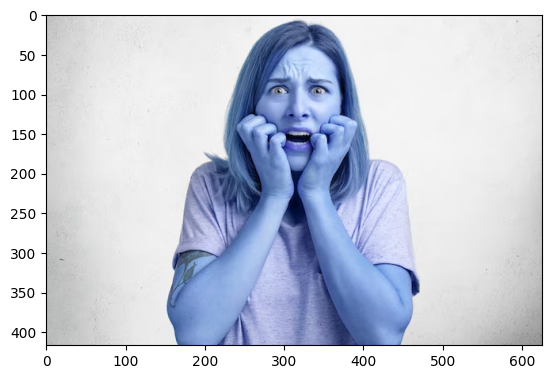

In [19]:
plt.imshow(img)

In [20]:
predictions=DeepFace.analyze(img)

Action: race: 100%|███████| 4/4 [00:02<00:00,  1.81it/s]


In [21]:
predictions

[{'emotion': {'angry': 0.006590829099820054,
   'disgust': 1.3079979546388792e-08,
   'fear': 95.30313583035087,
   'happy': 8.459280891497594e-07,
   'sad': 2.0045097249454096,
   'surprise': 2.685730505629212,
   'neutral': 3.1493552400171624e-05},
  'dominant_emotion': 'fear',
  'region': {'x': 259,
   'y': 46,
   'w': 124,
   'h': 124,
   'left_eye': (33, 50),
   'right_eye': (82, 49)},
  'face_confidence': 0.93,
  'age': 30,
  'gender': {'Woman': 99.62103366851807, 'Man': 0.37896858993917704},
  'dominant_gender': 'Woman',
  'race': {'asian': 3.9129164069890976,
   'indian': 3.5091206431388855,
   'black': 0.9366665966808796,
   'white': 26.167675852775574,
   'middle eastern': 8.707300573587418,
   'latino hispanic': 56.766319274902344},
  'dominant_race': 'latino hispanic'}]

In [ ]:
import cv2
from deepface import DeepFace
# faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_defaul.xml')
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(1)

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open")

while True:
    ret,frame=cap.read()
    result=DeepFace.analyze(frame,actions=['emotion'])
    grey=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    faces=faceCascade.detectMultiScale(grey,1.1,4)
    
    for(x,y,w,h) in faces:
     cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,str(result[0]['dominant_emotion']),(10,100),font,2,(0,255,0),1,cv2.LINE_4);
    cv2.imshow('original video',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    
    